In [34]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [36]:
# my acquire and prepare file
import acquire
import prepare

## Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [30]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [31]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [32]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [33]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [15]:
#Train validate test split
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

In [ ]:
#check shape

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features.
X_train = train.drop(columns=['survived'])
y_train = train.survived
train.survived

In [ ]:
#Validate and Test 
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [ ]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, did not survive

In [ ]:
#Establish Baseline
y_train.info()

####  baseline prediction? 

In [ ]:
#Baseline Accuracy
(y_train == 0).mean()

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# model.fit(X, y)

tree.fit(X_train, y_train)

In [ ]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

In [ ]:
# Visualize the tree NOT WORKING
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [ ]:
#Use your model to make predictions on the in-sample data
tree.predict(X_train)

In [ ]:
predictions = tree.predict(X_train)
actual = y_train

In [ ]:
#Baseline accuracy
(y_train == 0).mean()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
confusion_matrix(actual, predictions)

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
#On validate data
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(tree.score(X_validate, y_validate)))

In [ ]:
acc = tree.score(X_train, y_train)
acc

In [ ]:
#Could calculate this way, need to define y predictions
#TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
#TP, FP, FN, TP

### 5. Run through steps 2-4 using a different max_depth value.

#### Using Tree 2, 4 levels of depth

In [ ]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [ ]:
# model.fit(X, y)

tree2.fit(X_train, y_train)

In [ ]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

In [ ]:
#Use your model to make predictions on the in-sample data
tree2.predict(X_train)

In [ ]:
predictions = tree2.predict(X_train)
actual = y_train

#### Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
confusion_matrix(actual, predictions)

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

In [ ]:
#Calculating from validation data
predictions = tree2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree2.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(tree2.score(X_validate, y_validate)))

### 6. Which model performs better on your in-sample data?

In [ ]:
#Tree2 (model 2) performs better on my sample (training) data

### 7. Which model performs best on your out-of-sample data, the validate set?


In [ ]:
#Tree 1 (model 1) performs better on the validate data

## CONCLUSIONS: By changing max depth to four levels, we increased accuracy slightly, but also made a more precise model (model 2 aka 'Tree 2' had a much lower false positive rate than model 1).

--------------------###------------------

## TELCO DATA SET

In [4]:
### Acquire
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
#Prep telco data
def prep_telco_data(df):
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
       
    # Drop null values stored as whitespace    
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges != '']
    
    # Convert to correct datatype
    df['total_charges'] = df.total_charges.astype(float)
    
    # Convert binary categorical variables to numeric
    df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
    df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
    df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
    df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
    df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
    df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
    
    # Get dummies for non-binary categorical variables
    dummy_df = pd.get_dummies(df[['multiple_lines', \
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type']], dummy_na=False, \
                              drop_first=True)
    
    # Concatenate dummy dataframe to original 
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [6]:
df = prep_telco_data(df)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_32382/2389327310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_charges'] = df.total_charges.astype(float)
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_32382/2389327310.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = df.gender.map({'Female': 1, 'Male': 0})
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_32382/2389327310.py:15: SettingWithCopyWarning: 
A value is trying to be set on

In [9]:
#Drop Columns not needed for modeling
df.drop(['gender','partner','dependents','phone_service','multiple_lines',\
                              'online_security', \
                              'online_backup', \
                              'device_protection', \
                              'tech_support', \
                              'streaming_tv', \
                              'streaming_movies', \
                              'contract_type', \
                              'internet_service_type', \
                              'payment_type', \
                              'paperless_billing', \
                              'churn'], axis=1, inplace=True)

In [10]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.6,593.30,1,1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.9,542.40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.9,280.85,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.0,1237.85,0,1,0,1,1,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.9,267.40,1,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1


In [11]:
#Renaming churn encoded
df.rename(columns = {'churn_encoded':'churn'}, inplace = True)

In [13]:
df.head().T

,0,1,2,3,4
senior_citizen,0.0,0.0,0.00,1.00,1.0
tenure,9.0,9.0,4.00,13.00,3.0
monthly_charges,65.6,59.9,73.90,98.00,83.9
total_charges,593.3,542.4,280.85,1237.85,267.4
gender_encoded,1.0,0.0,0.00,0.00,1.0
partner_encoded,1.0,0.0,0.00,1.00,1.0
dependents_encoded,1.0,0.0,0.00,0.00,0.0
phone_service_encoded,1.0,1.0,1.00,1.00,1.0
paperless_billing_encoded,1.0,0.0,1.00,1.00,1.0
churn,0.0,0.0,1.00,1.00,1.0


### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [16]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

In [17]:
# create X & y version of train, where y is a series with just the target variable and X are all the features.
X_train = train.drop(columns=['churn'])
y_train = train.churn
train.churn

5919    0
1915    0
5054    0
2355    0
6279    0
       ..
394     0
3763    1
3444    0
1002    0
4192    0
Name: churn, Length: 3937, dtype: int64

In [18]:
#check shape
train.shape
validate.shape
test.shape

(1407, 31)

In [19]:
#Create validate and test data
#Validate and Test 
X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [20]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

0    2891
1    1046
Name: churn, dtype: int64

In [21]:
#Baseline Accuracy
(y_train == 0).mean()

0.7343154686309372

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [22]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [23]:
# model.fit(X, y)

tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [24]:
print(export_text(tree1, feature_names=X_train.columns.tolist()))

|--- tenure <= 15.50
|   |--- internet_service_type_Fiber optic <= 0.50
|   |   |--- tenure <= 3.50
|   |   |   |--- class: 0
|   |   |--- tenure >  3.50
|   |   |   |--- class: 0
|   |--- internet_service_type_Fiber optic >  0.50
|   |   |--- total_charges <= 124.47
|   |   |   |--- class: 1
|   |   |--- total_charges >  124.47
|   |   |   |--- class: 1
|--- tenure >  15.50
|   |--- internet_service_type_Fiber optic <= 0.50
|   |   |--- contract_type_Two year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_Two year >  0.50
|   |   |   |--- class: 0
|   |--- internet_service_type_Fiber optic >  0.50
|   |   |--- tenure <= 49.50
|   |   |   |--- class: 0
|   |   |--- tenure >  49.50
|   |   |   |--- class: 0



In [25]:
#Use your model to make predictions on the in-sample data
tree1.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

--------------------##Random Forest Exercises##--------------------------------

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [37]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [38]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [39]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [40]:
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [49]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
   
    train_validate, test = train_test_split(df, test_size=0.1, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.1111, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [50]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [51]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [52]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [53]:
print(rf.feature_importances_)

[0.10507678 0.2479201  0.04239187 0.03582842 0.22278323 0.01603771
 0.29419316 0.01793043 0.00458469 0.01325362]


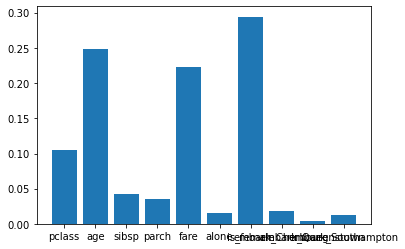

In [54]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [55]:
#Make predictions
y_pred = rf.predict(X_train)

In [56]:
rf.classes_

array([0, 1])

In [57]:
y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.96532994, 0.03467006],
       [0.02452785, 0.97547215],
       [0.94546868, 0.05453132],
       ...,
       [0.72003194, 0.27996806],
       [0.8722148 , 0.1277852 ],
       [0.96686841, 0.03313159]])

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [64]:
#  mode for target?
y_train.mode()

0    0
Name: survived, dtype: int64

In [65]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.6


In [66]:
#Evaluate the model's performance on train
y_predictions = rf.predict(X_train)

In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       338
           1       0.99      0.91      0.95       230

    accuracy                           0.96       568
   macro avg       0.96      0.95      0.96       568
weighted avg       0.96      0.96      0.96       568



In [58]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.96


In [68]:
# classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.941011,0.985849,0.957746,0.96343,0.959167
recall,0.991124,0.908696,0.957746,0.94991,0.957746
f1-score,0.965418,0.945701,0.957746,0.95556,0.957434
support,338.000000,230.000000,0.957746,568.00000,568.000000


In [59]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[335   3]
 [ 21 209]]


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### Training Set

In [70]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[335   3]
 [ 21 209]]


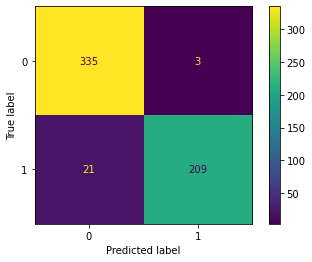

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [74]:
#Creating classification report on training data

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(209, 335, 3, 21)

In [75]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.9577464788732394
True Positive Rate: 0.908695652173913
False Positive Rate: 0.008875739644970414
True Negative Rate: 0.9911242603550295
False Negative Rate: 0.09130434782608696
Precision: 0.9858490566037735
Recall: 0.908695652173913
F1 Score: 0.9457013574660633
Support (0): 230
Support (1): 338


### VALIDATE SET

In [76]:
rf.score(X_validate, y_validate)

0.7638888888888888

In [77]:
#Accuracy of validate set
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [78]:
### Acquire
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [79]:
#Prepare titanic data
titanic_df = prepare.prep_titanic(titanic_df)
titanic_df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [80]:
#Drop Columns not needed for modeling
titanic_df.drop(['embarked'], axis=1, inplace=True)

In [81]:
# split into train, validate, test
# split into train, validate, test
train, validate, test = train_validate_test_split(titanic_df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [82]:
#Increasing min samples leaf and decreasing max depth
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [83]:
#Fit
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=3, random_state=123)

In [86]:
#Print feature importances
print(rf2.feature_importances_)

[0.15169214 0.13432176 0.0338529  0.02892917 0.14856235 0.01425727
 0.44945571 0.01937189 0.00330919 0.01624763]


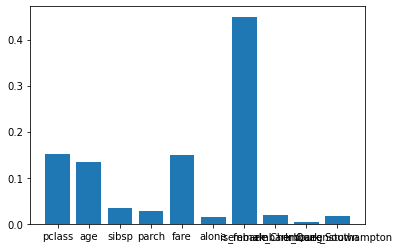

In [87]:
#Show feature importances
plt.bar(X_train.columns, rf2.feature_importances_)
plt.show()

#### Make Predictions

In [88]:
#predictions
y_pred = rf2.predict(X_train)

In [89]:
rf.classes_

array([0, 1])

In [90]:
y_pred_proba = rf2.predict_proba(X_train)
y_pred_proba
#Tells the prediction of probability a being made

array([[0.87971655, 0.12028345],
       [0.20103229, 0.79896771],
       [0.88155373, 0.11844627],
       ...,
       [0.57331034, 0.42668966],
       [0.66271547, 0.33728453],
       [0.87971655, 0.12028345]])

#### Evaluate your results using the model score, confusion matrix, and classification report.

In [91]:
#  mode for target
y_train.mode()

0    0
Name: survived, dtype: int64

In [92]:
# Establish our baseline prediction 
baseline = y_train.mode()

# Next let establish a baseline accuracy
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline prediction: {baseline[0]}")
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline prediction: 0
Baseline accuracy: 0.6


In [93]:
#Evaluate the model's performance on train
y_predictions = rf2.predict(X_train)

In [94]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       338
           1       0.92      0.69      0.79       230

    accuracy                           0.85       568
   macro avg       0.87      0.82      0.84       568
weighted avg       0.86      0.85      0.85       568



In [95]:
print('Accuracy of random forest classifier model 2 on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier model 2 on training set: 0.85


In [96]:
# classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of depth 5")
pd.DataFrame(report)

Tree of depth 5


,0,1,accuracy,macro avg,weighted avg
precision,0.820253,0.919075,0.850352,0.869664,0.860269
recall,0.958580,0.691304,0.850352,0.824942,0.850352
f1-score,0.884038,0.789082,0.850352,0.836560,0.845588
support,338.000000,230.000000,0.850352,568.000000,568.000000


#### Calculate accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [98]:
# sklearn confusion matrix
cm = confusion_matrix(y_train, y_predictions)
print(cm)

[[324  14]
 [ 71 159]]


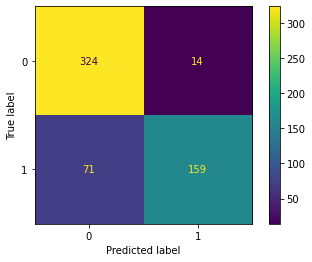

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

disp.plot()
plt.show()

In [100]:
#Creating classification report on training data

TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(159, 324, 14, 71)

In [101]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8503521126760564
True Positive Rate: 0.691304347826087
False Positive Rate: 0.04142011834319527
True Negative Rate: 0.9585798816568047
False Negative Rate: 0.30869565217391304
Precision: 0.9190751445086706
Recall: 0.691304347826087
F1 Score: 0.7890818858560795
Support (0): 230
Support (1): 338
